# 【練習問題】都市サイクルの燃料消費量予測

## 課題
車の情報から都市サイクルの燃料消費量を予測するモデルを作成していただきます

## データ概要

- 課題種別：回帰
- データ種別：多変量
- 学習データサンプル数：199
- 説明変数の数：9
- 欠損値：あり

## 評価

- 精度評価は、評価関数「MAE」を使用します。
- 評価値は0以上の値をとり、精度が高いほど小さな値となります。
- 暫定評価は、評価用データ全てに対する評価結果になります。

$$
MAE=\frac{1}{n}\sum_{i=1}^n |y_{i}-\hat{y_i}|
$$


In [76]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
TRAIN_DATA_URL = glob.glob("/home/jovyan/data/fuel-consumption/train*")[0]
TEST_DATA_URL = glob.glob("/home/jovyan/data/fuel-consumption/test*")[0]

## データの詳細：

|column|type|description|
|---|---|---|
|id |int|インデックスとして使用
|mpg|int|燃料消費量
|cylinders| int	|シリンダー
|displacement|int|	変位
|horsepower|int|馬力（一部に欠損があり、欠損箇所は文字列"?"で表記されています）
|weight|int|重量
|acceleration|float|加速
|model year|int|モデル年
|origin|int|起源
|car name|varchar|車名

In [78]:
train_data = pd.read_csv(TRAIN_DATA_URL, sep="\t").drop("Unnamed: 0", axis=1).sort_values('mpg')
train_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
86,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
152,10.0,8,360.0,215,4615,14.0,70,1,ford f250
167,11.0,8,429.0,208,4633,11.0,72,1,mercury marquis
134,12.0,8,383.0,180,4955,11.5,71,1,dodge monaco (sw)
89,12.0,8,400.0,167,4906,12.5,73,1,ford country


In [108]:
train_data.sort_values("mpg",ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
183,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
45,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
25,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
143,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
0,39.4,4,85.0,70,2070,18.6,78,3,datsun b210 gx
...,...,...,...,...,...,...,...,...,...
89,12.0,8,400.0,167,4906,12.5,73,1,ford country
134,12.0,8,383.0,180,4955,11.5,71,1,dodge monaco (sw)
167,11.0,8,429.0,208,4633,11.0,72,1,mercury marquis
152,10.0,8,360.0,215,4615,14.0,70,1,ford f250


In [134]:
train_data['car name'] = train_data["car name"].str.split(expand=True)[0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
86,9.0,8,304.0,193,4732,18.5,70,1,hi
152,10.0,8,360.0,215,4615,14.0,70,1,ford
167,11.0,8,429.0,208,4633,11.0,72,1,mercury
134,12.0,8,383.0,180,4955,11.5,71,1,dodge
89,12.0,8,400.0,167,4906,12.5,73,1,ford
...,...,...,...,...,...,...,...,...,...
0,39.4,4,85.0,70,2070,18.6,78,3,datsun
143,40.8,4,85.0,65,2110,19.2,80,3,datsun
25,40.9,4,85.0,?,1835,17.3,80,2,renault
45,44.0,4,97.0,52,2130,24.6,82,2,vw


In [80]:
y_data = train_data["mpg"]

x_data = train_data.drop("mpg",axis=1)
x_data = train_data.drop("car name",axis=1)

x_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
86,9.0,8,304.0,193,4732,18.5,70,1
152,10.0,8,360.0,215,4615,14.0,70,1
167,11.0,8,429.0,208,4633,11.0,72,1
134,12.0,8,383.0,180,4955,11.5,71,1
89,12.0,8,400.0,167,4906,12.5,73,1
...,...,...,...,...,...,...,...,...
0,39.4,4,85.0,70,2070,18.6,78,3
143,40.8,4,85.0,65,2110,19.2,80,3
25,40.9,4,85.0,?,1835,17.3,80,2
45,44.0,4,97.0,52,2130,24.6,82,2


In [81]:
x_data.isnull().sum() # 欠損値（Null） はなし:

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [82]:
x_data[x_data['horsepower'] == '?'].index

# 欠損値は３車
# 今回はこれらのデータは削除した方が早いかも(3/199 なので)

Int64Index([176, 80, 25], dtype='int64')

In [83]:
drop_index_array = x_data[x_data['horsepower'] == '?']

x_data = x_data.drop(drop_index_array.index)
y_data = y_data.drop(drop_index_array.index)
x_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
86,9.0,8,304.0,193,4732,18.5,70,1
152,10.0,8,360.0,215,4615,14.0,70,1
167,11.0,8,429.0,208,4633,11.0,72,1
134,12.0,8,383.0,180,4955,11.5,71,1
89,12.0,8,400.0,167,4906,12.5,73,1
...,...,...,...,...,...,...,...,...
3,38.1,4,89.0,60,1968,18.8,80,3
0,39.4,4,85.0,70,2070,18.6,78,3
143,40.8,4,85.0,65,2110,19.2,80,3
45,44.0,4,97.0,52,2130,24.6,82,2


/tmp/ipykernel_23076/3654315904.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  x_data.hist(ax=ax)


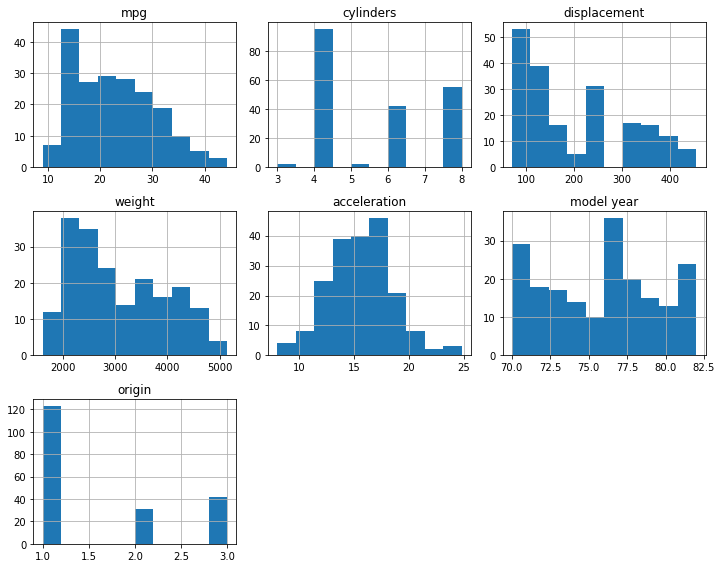

In [84]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
x_data.hist(ax=ax)
plt.tight_layout()

<AxesSubplot:>

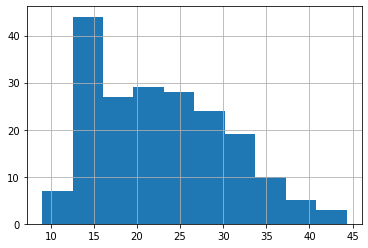

In [85]:
y_data.hist()

In [86]:
train_data.corr()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.793012,-0.820597,-0.854548,0.445578,0.531445,0.575644
cylinders,-0.793012,1.000000,0.947816,0.909054,-0.495192,-0.327977,-0.598204
displacement,-0.820597,0.947816,1.000000,0.946437,-0.559381,-0.352672,-0.636646
weight,-0.854548,0.909054,0.946437,1.000000,-0.453418,-0.290512,-0.631557
acceleration,0.445578,-0.495192,-0.559381,-0.453418,1.000000,0.310780,0.238708
model year,0.531445,-0.327977,-0.352672,-0.290512,0.310780,1.000000,0.072809
origin,0.575644,-0.598204,-0.636646,-0.631557,0.238708,0.072809,1.000000


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_data.loc[:,['displacement','weight','cylinders']],y_data,test_size=0.2,random_state=23) 

svm = SVR()
svm.fit(x_train,y_train)


SVR()

In [92]:

y_pred = svm.predict(x_test)
mean_absolute_error(y_test,y_pred)

3.030739584360701

In [93]:


test_data =pd.read_csv(TEST_DATA_URL,sep='\t') 
input_data = test_data.loc[:,['displacement','weight','cylinders']]

output_data = svm.predict(input_data)
output_data



array([13.76602128, 24.42456874, 23.16135226, 27.44840111, 28.03467323,
       19.45734256, 28.26428093, 27.35190167, 28.3086118 , 22.32853817,
       17.72735733, 21.01095241, 28.482519  , 28.76325324, 28.03898521,
       28.12157319, 28.64624377, 26.88985836, 27.16871554, 20.95999317,
       15.23753419, 29.15922472, 22.4690111 , 26.72967094, 25.2406554 ,
       17.25638967, 24.72768345, 20.45030715, 27.58653018, 29.05873969,
       13.96338958, 26.01271544, 27.85576425, 22.87745379, 23.00469985,
       21.78688617, 25.74277705, 23.02637173, 28.44394971, 16.93167042,
       17.36363092, 27.73067805, 29.14150702, 29.22969238, 13.31788855,
       15.63864005, 21.67598346, 27.27948632, 19.54422931, 12.77759308,
       22.42971106, 27.74044774, 23.62075882, 28.04379194, 27.21487445,
       27.53547443, 23.05267241, 28.05985246, 22.13795412, 27.86074444,
       18.23637573, 27.89041715, 28.5066463 , 17.91227472, 27.32812251,
       28.65766837, 24.94731164, 29.3031611 , 27.49568297, 27.89

In [105]:
SUBMIT_DATA_URL = glob.glob("/home/jovyan/data/fuel-consumption/sample*")[0]
SUBMIT_DATA_URL

output_csv = pd.read_csv(SUBMIT_DATA_URL,header=None)
output_csv[0] = test_data['Unnamed: 0']
output_csv[1] = output_data

output_csv.to_csv("/home/jovyan/data/fuel-consumption.csv",header=None,index=None)